# Dados Utilizados

Utilizamos dados da billboard e do spotify para fazer uma análise das músicas mais populares.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Tratando os dados

Começamos selecionando as colunas que vamos usar e depois filtrando as linhas que possuem dados faltantes.

In [2]:
songs = pd.read_csv('../dataset/billboard_2000_2018_spotify_lyrics.csv',
                 encoding='iso-8859-1', na_values='unknown')

songs = songs[['date', 'title', 'artist', 'peak_pos', 'last_pos', 'weeks', 'rank', 'genre', 'energy', 'liveness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'time_signature', 'danceability', 'key','duration_ms', 'loudness', 'valence', 'mode']]

# Removendo na
songs = songs.dropna()

In [3]:
songs.head()

,date,title,artist,peak_pos,last_pos,weeks,rank,genre,energy,liveness,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
1,6/21/18,All Girls Are The Same,Juice WRLD,41,49,5,41,[u'rap'],0.529,0.0856,...,0.3070,0.0769,0.000335,4.0,0.671,0.0,165820.0,-7.226,0.203,1.0
2,6/21/18,All Mine,Kanye West,11,11,2,31,"[u'pop rap', u'rap']",0.308,0.0933,...,0.3380,0.1250,0.000000,4.0,0.925,11.0,145507.0,-6.562,0.265,0.0
5,6/21/18,Back To You,Selena Gomez,22,31,5,22,"[u'dance pop', u'pop', u'post-teen pop']",0.724,0.1200,...,0.0486,0.0945,0.000002,4.0,0.601,6.0,207905.0,-4.856,0.508,1.0
7,6/21/18,Be Careful,Cardi B,11,25,11,23,"[u'pop', u'rap']",0.568,0.0952,...,0.4110,0.0256,0.000000,4.0,0.820,6.0,210787.0,-8.230,0.535,0.0
8,6/21/18,Beautiful Crazy,Luke Combs,58,77,4,93,"[u'contemporary country', u'country road']",0.402,0.0928,...,0.0262,0.6760,0.000000,4.0,0.552,11.0,193200.0,-7.431,0.382,1.0


Podemos observar que os gêneros não estão processáveis. Como faremos uma análise de gênero, será importante que eles estejam padronizados. Assim, vamos realizar um one-hot encoding dos gêneros mais relevantes.

In [4]:
#transforma gêneros para formato de lista
genres_list = []

for value in songs['genre'].values:
    value = value.replace("u'", "")
    value = value.replace("'", "")
    value = value.replace("[", "")
    value = value.replace("]", "")
    
    song_genres = value.split(", ")
    genres_list.append(song_genres)

songs_with_genres = songs.copy()
    
songs_with_genres['genre'] = genres_list
songs_with_genres

,date,title,artist,peak_pos,last_pos,weeks,rank,genre,energy,liveness,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
1,6/21/18,All Girls Are The Same,Juice WRLD,41,49,5,41,[rap],0.529,0.0856,...,0.3070,0.076900,0.000335,4.0,0.671,0.0,165820.0,-7.226,0.2030,1.0
2,6/21/18,All Mine,Kanye West,11,11,2,31,"[pop rap, rap]",0.308,0.0933,...,0.3380,0.125000,0.000000,4.0,0.925,11.0,145507.0,-6.562,0.2650,0.0
5,6/21/18,Back To You,Selena Gomez,22,31,5,22,"[dance pop, pop, post-teen pop]",0.724,0.1200,...,0.0486,0.094500,0.000002,4.0,0.601,6.0,207905.0,-4.856,0.5080,1.0
7,6/21/18,Be Careful,Cardi B,11,25,11,23,"[pop, rap]",0.568,0.0952,...,0.4110,0.025600,0.000000,4.0,0.820,6.0,210787.0,-8.230,0.5350,0.0
8,6/21/18,Beautiful Crazy,Luke Combs,58,77,4,93,"[contemporary country, country road]",0.402,0.0928,...,0.0262,0.676000,0.000000,4.0,0.552,11.0,193200.0,-7.431,0.3820,1.0
9,6/21/18,Better Now,Post Malone,7,34,7,20,"[pop, rap]",0.563,0.1360,...,0.0454,0.354000,0.000000,4.0,0.680,10.0,231267.0,-5.843,0.3740,1.0
11,6/21/18,Boo'd Up,Ella Mai,6,6,11,7,"[dance pop, indie r&b, pop, r&b, urban contemp...",0.779,0.0780,...,0.0531,0.086200,0.000000,4.0,0.561,10.0,256064.0,-5.107,0.2350,0.0
12,6/21/18,Call Out My Name,The Weeknd,4,52,11,54,"[canadian pop, pop, rap]",0.599,0.3270,...,0.0369,0.211000,0.000000,3.0,0.449,1.0,228373.0,-4.892,0.1650,1.0
13,6/21/18,Chun-Li,Nicki Minaj,10,46,10,43,"[dance pop, hip pop, pop, pop rap, rap]",0.766,0.1070,...,0.3840,0.307000,0.000014,4.0,0.643,6.0,191606.0,-4.788,0.4630,0.0
14,6/21/18,Cudi Montage,KIDS SEE GHOSTS,69,0,1,69,"[hip hop, pop, pop rap, rap]",0.504,0.1210,...,0.0321,0.401000,0.000001,4.0,0.729,8.0,197001.0,-6.784,0.3050,0.0


In [5]:
#recupera gêneros únicos

def get_unique_genres(songs):
    unique_genres = {}
      
    for genres in songs['genre']:
        for genre in genres:
            if genre in unique_genres:
                unique_genres[genre] += 1
            else:
                unique_genres[genre] = 1
    
    unique_genres = pd.DataFrame.from_dict(unique_genres, orient='index')
    unique_genres.sort_values(by=0, ascending=False, inplace=True)
    unique_genres.reset_index(level=0, inplace=True)
    unique_genres.columns = ['genre', 'quantity']
    
    return unique_genres

unique_genres = get_unique_genres(songs_with_genres)
unique_genres

,genre,quantity
0,pop,3114
1,dance pop,2685
2,pop rap,2201
3,rap,1828
4,post-teen pop,1563
5,hip hop,1335
6,r&b,1326
7,contemporary country,1252
8,southern hip hop,1188
9,country,1154


Fazendo a análise dos gêneros, podemos observar que muitos deles tem poucas músicas no Top 100. Isso é mostrado no histograma:

(array([367.,   7.,   3.,   6.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([1.0000e+00, 3.1230e+02, 6.2360e+02, 9.3490e+02, 1.2462e+03,
        1.5575e+03, 1.8688e+03, 2.1801e+03, 2.4914e+03, 2.8027e+03,
        3.1140e+03]),
 <a list of 10 Patch objects>)

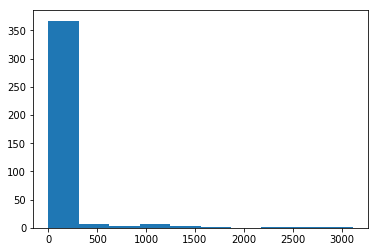

In [6]:
plt.hist(unique_genres['quantity'])

Assim, vamos criar uma lista apenas com os gêneros relevantes a partir de um número arbitrário, definido como pelo menos 5% da quantidade original de músicas.

In [7]:
def get_relevant_genres(songs, unique_genres):
    unique_genres.sort_values(by='quantity', ascending=False, inplace=True)
    return unique_genres[unique_genres['quantity'] >= songs.shape[0]*0.05]

relevant_genres = get_relevant_genres(songs_with_genres, unique_genres)
relevant_genres

,genre,quantity
0,pop,3114
1,dance pop,2685
2,pop rap,2201
3,rap,1828
4,post-teen pop,1563
5,hip hop,1335
6,r&b,1326
7,contemporary country,1252
8,southern hip hop,1188
9,country,1154


De posse dos nossos gêneros relevantes, conseguimos fazer o one-hot encoding da tabela.

In [8]:
#retorna lista de one-encoding por gênero
def genre_one_hot_encoding(songs_with_genres, genre):
    one_hot_encoding = songs_with_genres.genre.map(set([genre]).issubset)
    return list(one_hot_encoding.map({False:0, True:1}))

In [9]:
#itera sobre os gêneros adicionando colunas ao nosso dataframe de músicas para tratá-los como dados classificatórios
def one_hot_encoding(songs_with_genres, relevant_genres):  
    songs_one_hot_encoding = songs_with_genres[['peak_pos', 'weeks', 'rank', 'genre']]

    for i in range(relevant_genres.shape[0]):
        songs_one_hot_encoding.insert(i+4, relevant_genres['genre'][i], genre_one_hot_encoding(songs_with_genres, relevant_genres['genre'][i]))

    return songs_one_hot_encoding 

songs_one_hot_encoding = one_hot_encoding(songs_with_genres, relevant_genres)
songs_one_hot_encoding

,peak_pos,weeks,rank,genre,pop,dance pop,pop rap,rap,post-teen pop,hip hop,...,urban contemporary,trap music,hip pop,dirty south rap,pop rock,modern country rock,gangster rap,neo mellow,neo soul,post-grunge
1,41,5,41,[rap],0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,2,31,"[pop rap, rap]",0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,22,5,22,"[dance pop, pop, post-teen pop]",1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,11,11,23,"[pop, rap]",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,58,4,93,"[contemporary country, country road]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,7,7,20,"[pop, rap]",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,6,11,7,"[dance pop, indie r&b, pop, r&b, urban contemp...",1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
12,4,11,54,"[canadian pop, pop, rap]",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,10,10,43,"[dance pop, hip pop, pop, pop rap, rap]",1,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
14,69,1,69,"[hip hop, pop, pop rap, rap]",1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#agrupa por gênero para tirar estatísticas
def agruparGeneros(generos_relevantes, dfGenreRank):    
    estatisticas_generos = {}
    for i in range(generos_relevantes.shape[0]):
        genero = generos_relevantes.index.values[i]
        df_genero = dfGenreRank[['peak_pos', 'weeks', 'rank', genero]]
        group_genero = df_genero[df_genero[genero] == True]
        group_genero = group_genero.mean()[['peak_pos', 'weeks', 'rank']]

        estatisticas_generos[genero] = group_genero

    return pd.DataFrame.from_dict(estatisticas_generos, orient='index')

generos_relevantes, dfGenreRank = tratarGeneros(dfWithGenreList)

estatisticas_generos = agruparGeneros(generos_relevantes, dfGenreRank)
estatisticas_generos

NameError: name 'tratarGeneros' is not defined

In [ ]:
estatisticas_generos.sort_values(by='peak_pos')

In [ ]:
estatisticas_generos.sort_values(by='rank')

In [ ]:
estatisticas_generos.sort_values(by='weeks', ascending=False)

Assim, pelos três atributos analisados, podemos perceber algumas características: músicas que contém o estilo r&b, urban contemporary, dance pop e hip hop atingem posições mais altas no ranking. Porém, em geral, músicas pop (post-teen pop, pop e dance pop) permanecem em colocações mais altas durante a permanência. Em questão de permanência no top 100, os gêneros neo_mellow e pop rock são os mais altos, ficando em média 17 semanas no topo.

Agora, precisamos analisar se essas informações são ou não determinísticos. Vamos começar analisando a amostra das músicas que atingiram as 10 primeiras posições do ranking.

In [ ]:
dfTop10 = dfWithGenreList[dfWithGenreList['peak_pos'] < 11]
dfTop10

In [ ]:
generos_relevantes, dfGenreRank = tratarGeneros(dfTop10)
musicasTop10 = agruparGeneros(generos_relevantes, dfGenreRank)
musicasTop10

In [ ]:
musicasTop10.sort_values(by='peak_pos')

In [ ]:
musicasTop10.sort_values(by='rank')

In [ ]:
musicasTop10.sort_values(by='weeks', ascending=False)

Observamos aqui certa semelhança com o dataframe quando tratado em sua interidade. Músicas que contém o estilo r&b, urban contemporary e hip hop também atingiram posições mais altas no ranking. A média do rank porém não foi semelhante. Em questão de permanência no top 100, os gêneros neo_mellow e pop rock também continuam os mais altos.

Assim, agora vamos analisar se as músicas que atingem as posições mais altas realmente tem gêneros em comum ou se isso pode ser explicado pelo acaso.

Partiremos para os testes de hipóteses
SALVAR DADOS LIMPOS

In [ ]:
songs_with_genres.to_csv('../dataset/songs_with_genre.csv', index=False)
songs_one_hot_encoding.to_csv('../dataset/songs_one_hot_encoding.csv', index=False)
relevant_genres.to_csv('../dataset/genres_relevant.csv', index=False)